# Test Data Exploration and Submission Files Creation

This notebook will be used to take a look at how the model predicts on a small subset of the testing data available. We will also create the submission files to be sent to the moderators for evaluation. 

## Test Data Prediction Visualization

In [1]:
import os,glob,re,sys
sys.path.append('..')
import matplotlib.pyplot as plt

from src import data,prediction,unet,unet_dilation

test_dir1 = "/home/ubuntu/Test1Set"
test_dir2 = "/home/ubuntu/Test2Set"
out_dir = "/home/ubuntu/segmentationWithDilation"
out_dir2 = "/home/ubuntu/segmentationRegularUNet"

Using TensorFlow backend.


In [3]:
#test_dir1="/Users/aksharkumar/Documents/mlndCapstone/testingdata/Test1Set"
patient17_dir = os.path.join(test_dir1,"patient17")

num_imgs = 10

unet_dilate = unet_dilation.UNet()
model_endo_dilation = unet_dilate.get_unet(height=216,width=256,channels=1,features=32,steps=3)
model_epi_dilation = unet_dilate.get_unet(height=216,width=256,channels=1,features=32,steps=3)

predictor_test_1_dil = prediction.Predictor(test_dir1,"weights-250Epochs-NoDrop-Adam3-Dilation.hdf5",
                                           model_epi_dilation,model_endo_dilation)
# predictor_test_2 = prediction.Predictor(test_dir2)

o_predictions,i_predictions = predictor_test_1_dil.make_predictions_one(patient17_dir,num_imgs)

 Predictions (10 images) dilation model...


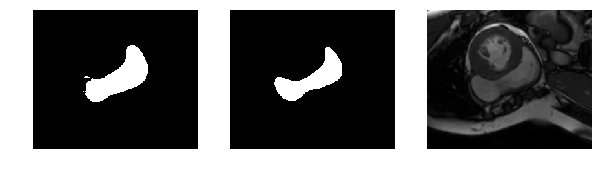

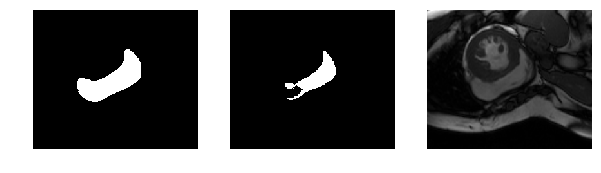

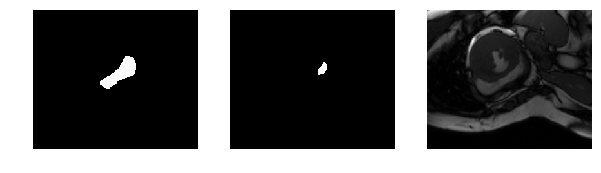

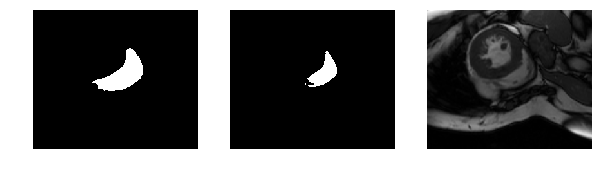

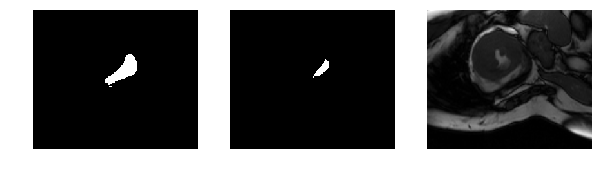

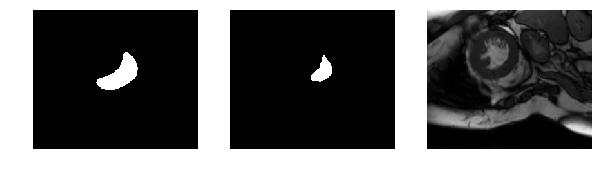

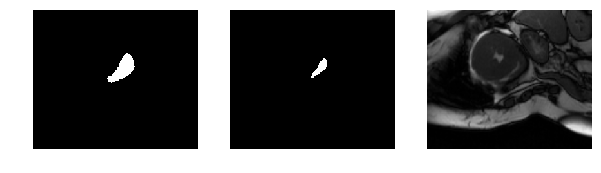

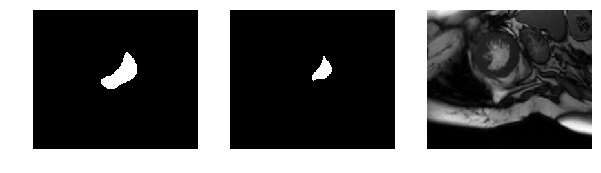

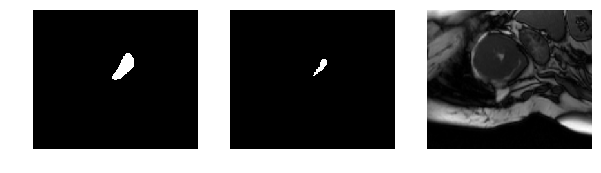

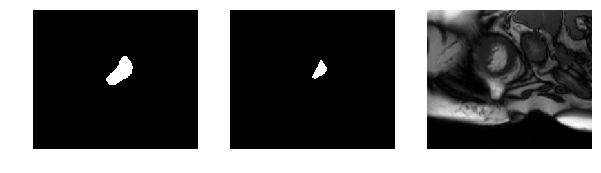

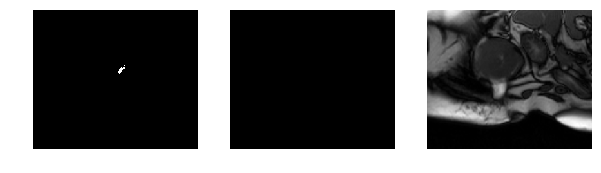

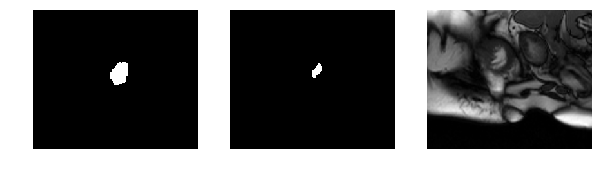

In [5]:
%matplotlib inline
import numpy as np
def show_segmentation_masks(o_predictions,i_predictions):
    for ((o_image,o_mask),(i_image,i_mask)) in zip(o_predictions,i_predictions):
        plt.figure(figsize=(10,5))
        plt.subplot(1, 3, 1)
        plt.axis("off")
        #print(mask.shape)
        plt.imshow(np.where(o_mask[0,:,:,1]>0.5,255,0), cmap=plt.cm.gray)
        plt.subplot(1, 3, 2)
        plt.axis("off")
        plt.imshow(np.where(i_mask[0,:,:,1]>0.5,255,0), cmap=plt.cm.gray)
        plt.subplot(1, 3, 3)
        plt.axis("off")
        plt.imshow(i_image, cmap=plt.cm.gray)

print(" Predictions ({} images) dilation model...".format(num_imgs))
show_segmentation_masks(o_predictions,i_predictions)
#print("Epicardium Predictions ({} images)...".format(num_imgs))
#show_segmentation_masks(o_predictions)

Endocardium Predictions (10 images) initial model...


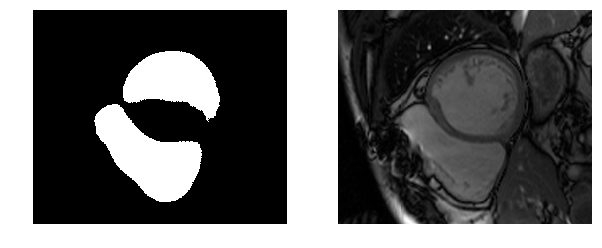

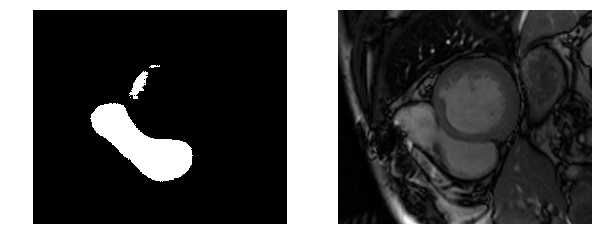

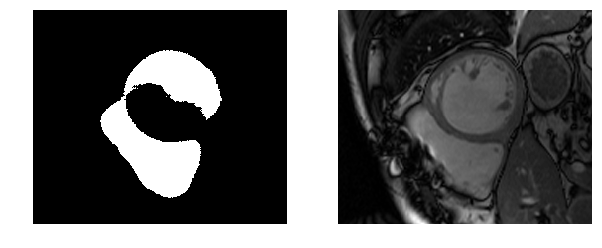

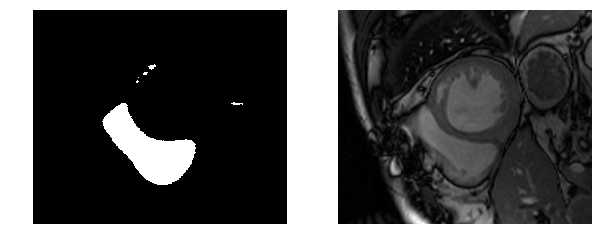

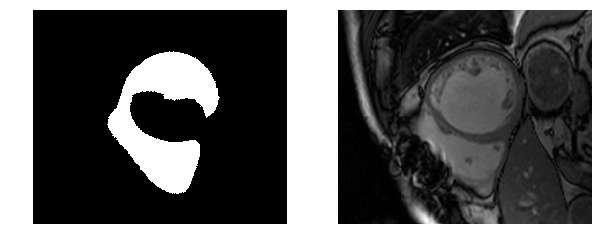

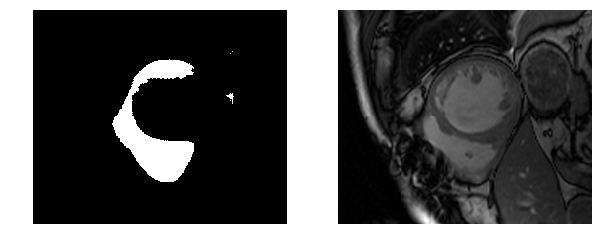

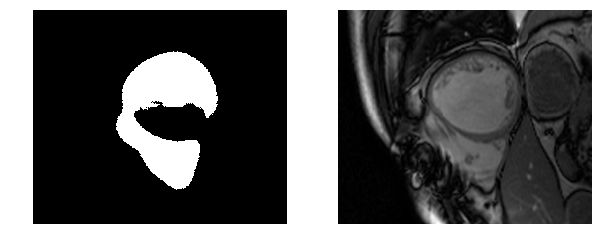

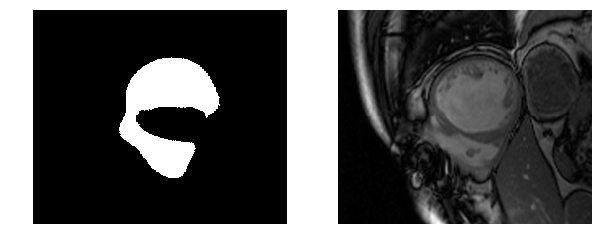

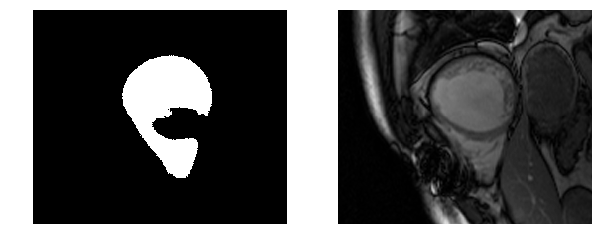

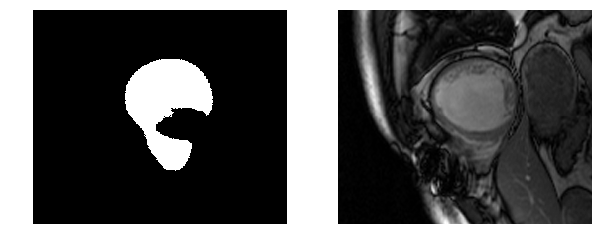

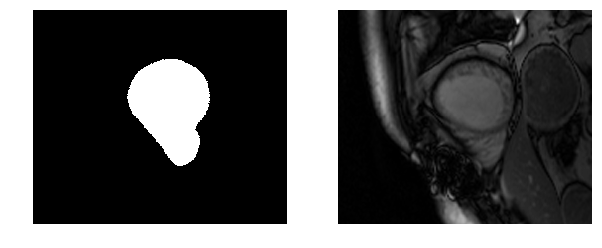

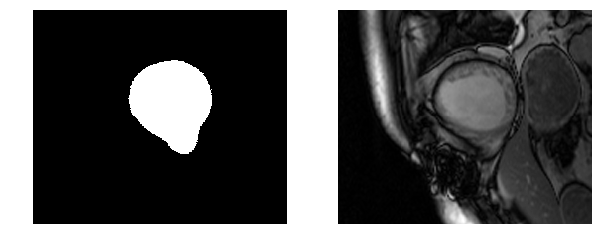

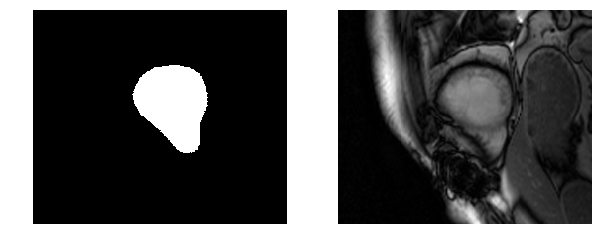

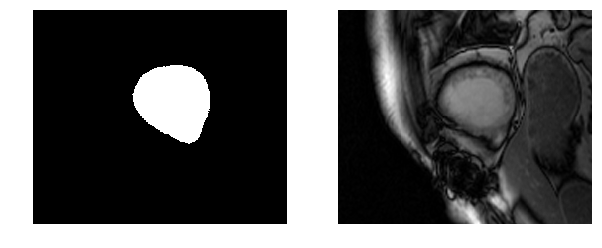

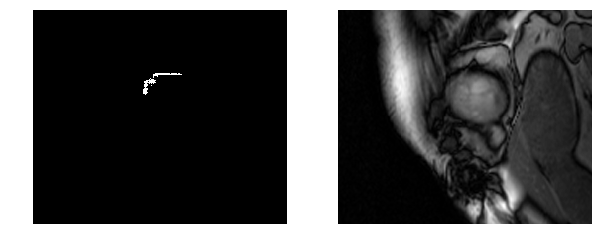

In [2]:
%matplotlib inline
import numpy as np
def show_segmentation_masks(predictions):
    for (image,mask) in predictions:
        plt.figure(figsize=(10,5))
        plt.subplot(1, 2, 1)
        plt.axis("off")
        #print(mask.shape)
        plt.imshow(np.where(mask[0,:,:,1]>0.5,255,0), cmap=plt.cm.gray)
        plt.subplot(1, 2, 2)
        plt.axis("off")
        plt.imshow(image, cmap=plt.cm.gray)

print("Endocardium Predictions ({} images) initial model...".format(num_imgs))
show_segmentation_masks(i_predictions)
#print("Epicardium Predictions ({} images)...".format(num_imgs))
#show_segmentation_masks(o_predictions)

Endocardium Predictions (10 images)...


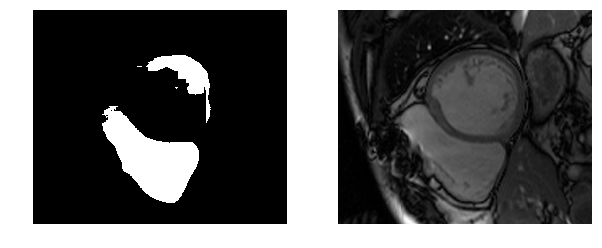

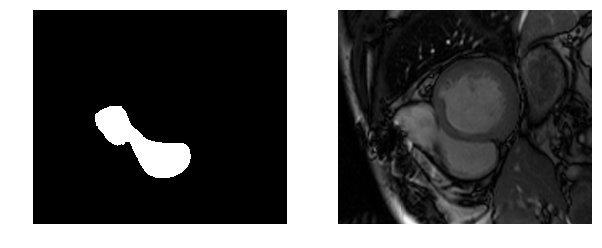

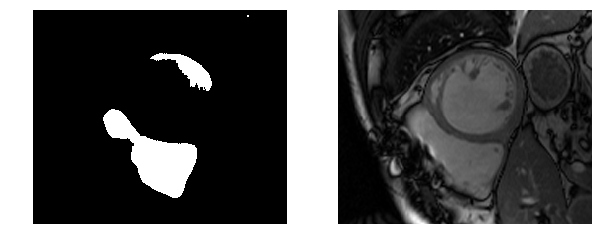

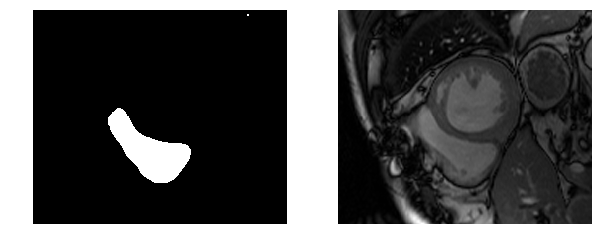

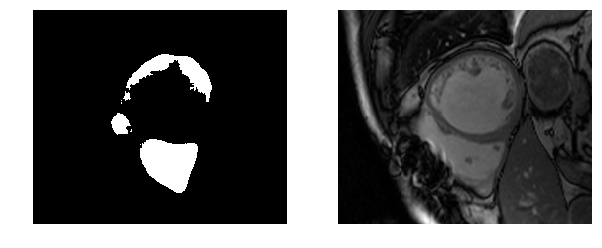

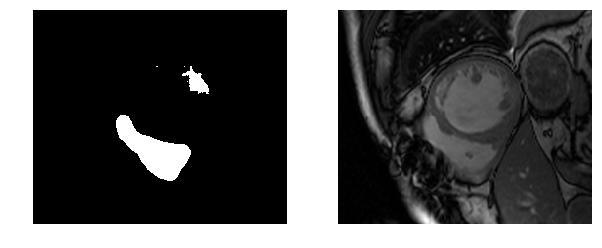

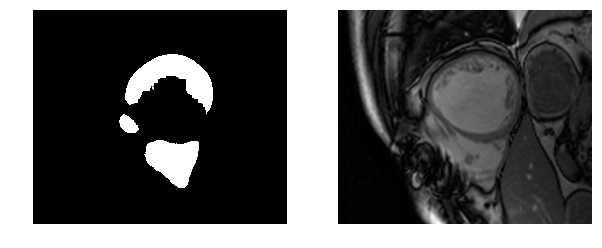

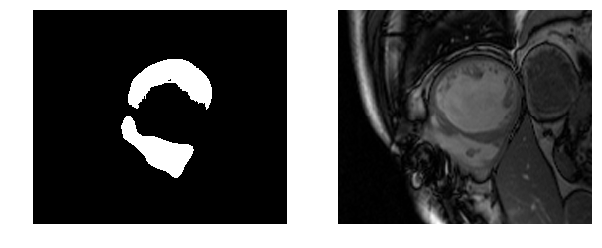

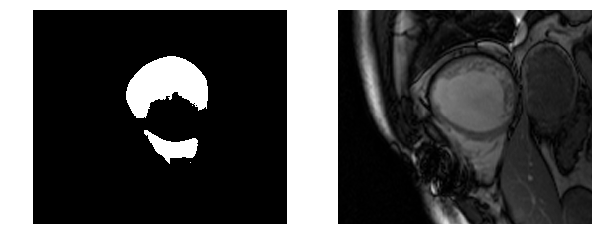

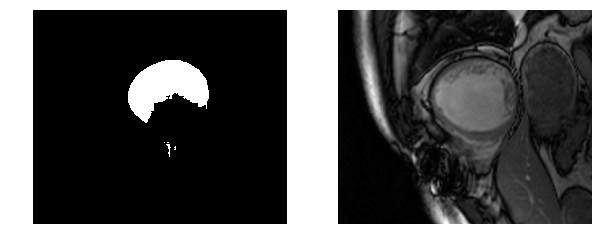

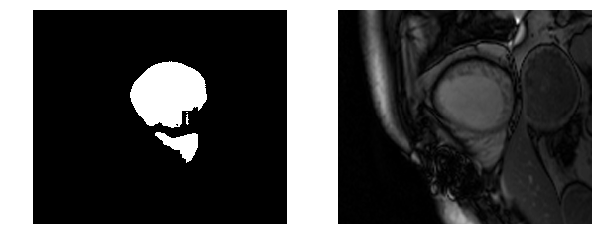

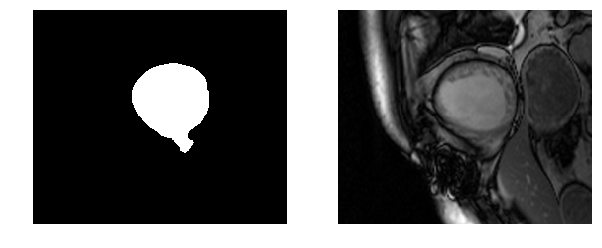

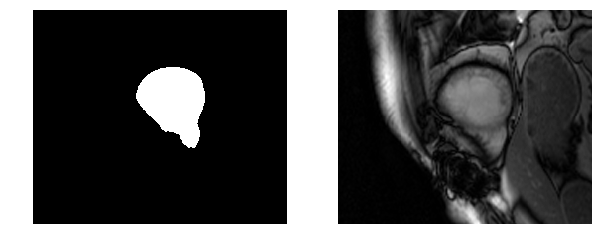

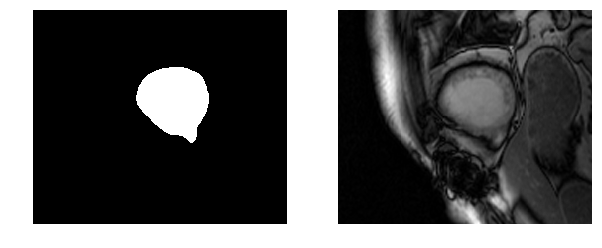

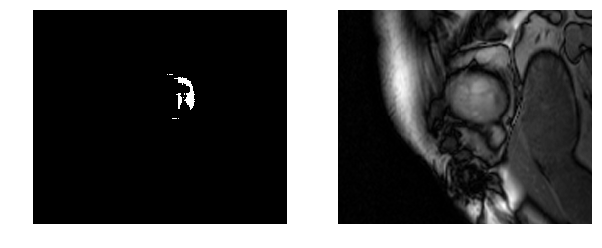

In [4]:
%matplotlib inline
import numpy as np
def show_segmentation_masks(predictions):
    for (image,mask) in predictions:
        plt.figure(figsize=(10,5))
        plt.subplot(1, 2, 1)
        plt.axis("off")
        #print(mask.shape)
        plt.imshow(np.where(mask[0,:,:,1]>0.5,255,0), cmap=plt.cm.gray)
        plt.subplot(1, 2, 2)
        plt.axis("off")
        plt.imshow(image, cmap=plt.cm.gray)

print("Endocardium Predictions ({} images)...".format(num_imgs))
show_segmentation_masks(i_predictions)
#print("Epicardium Predictions ({} images)...".format(num_imgs))
#show_segmentation_masks(o_predictions)

Endocardium Predictions (10 images)...


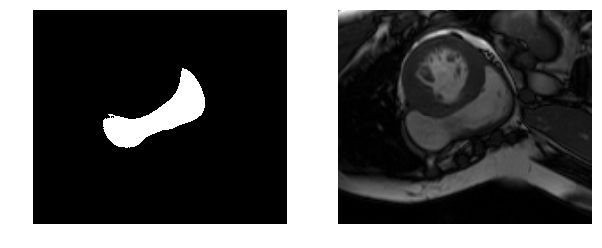

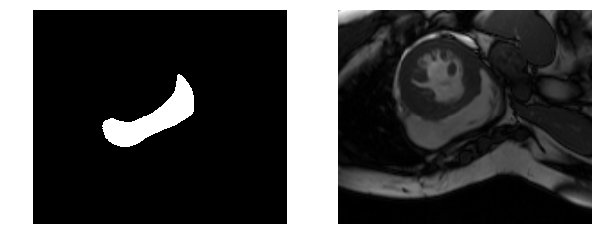

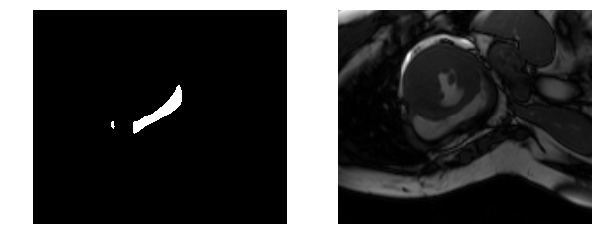

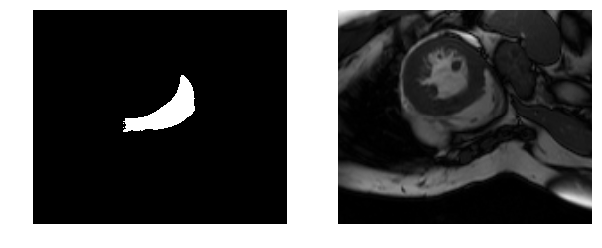

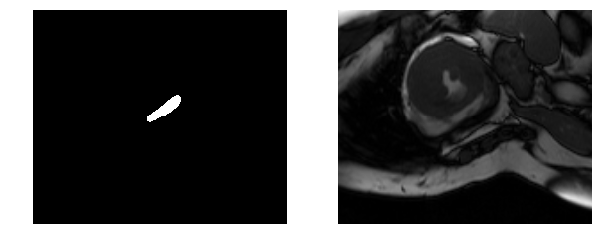

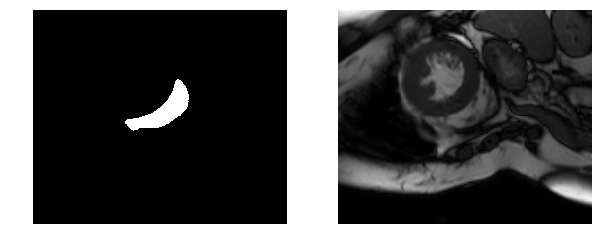

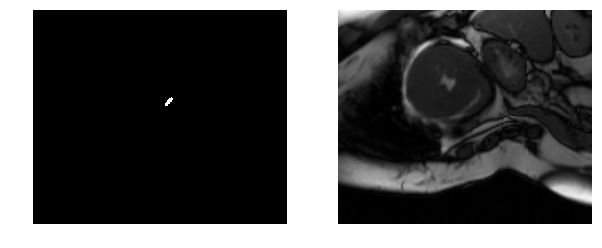

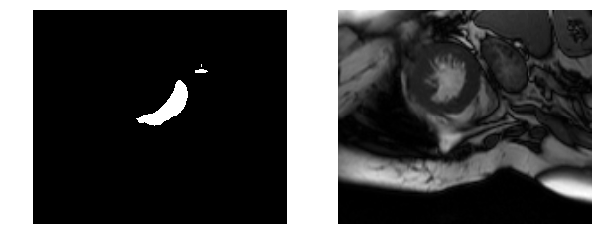

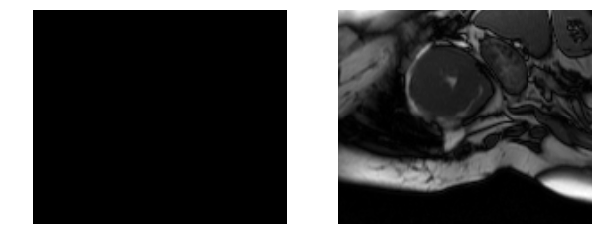

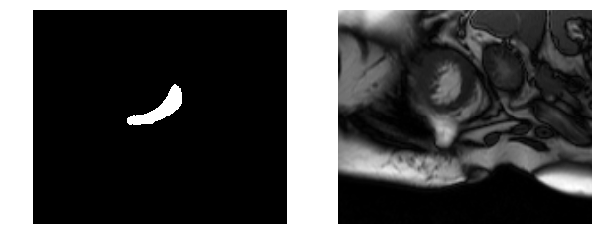

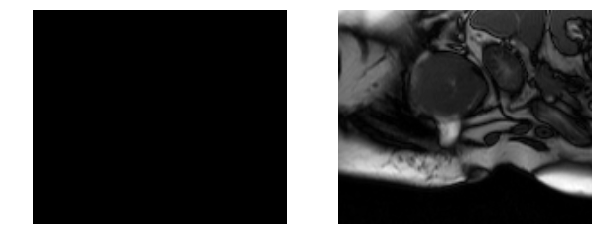

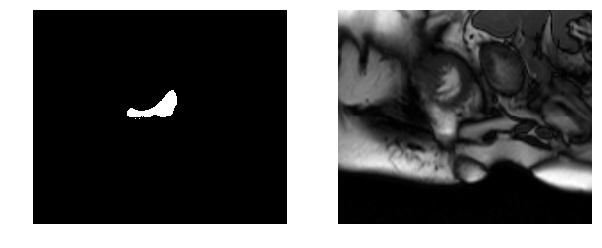

In [6]:
%matplotlib inline
import numpy as np
def show_segmentation_masks(predictions):
    for (image,mask) in predictions:
        plt.figure(figsize=(10,5))
        plt.subplot(1, 2, 1)
        plt.axis("off")
        #print(mask.shape)
        plt.imshow(np.where(mask[0,:,:,1]>0.5,255,0), cmap=plt.cm.gray)
        plt.subplot(1, 2, 2)
        plt.axis("off")
        plt.imshow(image, cmap=plt.cm.gray)

print("Endocardium Predictions ({} images)...".format(num_imgs))
show_segmentation_masks(i_predictions)
#print("Epicardium Predictions ({} images)...".format(num_imgs))
#show_segmentation_masks(o_predictions)

## Submission Files Creation

In [6]:
#predictor_test_1 = prediction.Predictor(test_dir1,"/home/ubuntu/cmri-rv-seg/notebooks/saved_models/endo_models/weights-250Epochs-NoDrop-Adam3-Dilation.hdf5")

epi_preds,endo_preds = predictor_test_1_dil.make_predictions(out_dir)

Prediction for Patient 17...
P17-0080-ocontour-auto.txt
-- Multiple contours detected.
P17-0100-ocontour-auto.txt
P17-0108-ocontour-auto.txt
P17-0120-ocontour-auto.txt
P17-0128-ocontour-auto.txt
-- Multiple contours detected.
P17-0140-ocontour-auto.txt
P17-0148-ocontour-auto.txt
P17-0160-ocontour-auto.txt
P17-0168-ocontour-auto.txt
P17-0180-ocontour-auto.txt
P17-0188-ocontour-auto.txt
-- Multiple contours detected.
P17-0200-ocontour-auto.txt
P17-0080-icontour-auto.txt
P17-0100-icontour-auto.txt
P17-0108-icontour-auto.txt
P17-0120-icontour-auto.txt
-- Multiple contours detected.
P17-0128-icontour-auto.txt
P17-0140-icontour-auto.txt
P17-0148-icontour-auto.txt
P17-0160-icontour-auto.txt
P17-0168-icontour-auto.txt
P17-0180-icontour-auto.txt
P17-0188-icontour-auto.txt
-- No contour detected.
P17-0200-icontour-auto.txt
Prediction for Patient 18...
P18-0040-ocontour-auto.txt
P18-0060-ocontour-auto.txt
P18-0080-ocontour-auto.txt
P18-0087-ocontour-auto.txt
P18-0100-ocontour-auto.txt
P18-0107-oc

Prediction for Patient 25...
P25-0020-ocontour-auto.txt
P25-0040-ocontour-auto.txt
P25-0046-ocontour-auto.txt
P25-0060-ocontour-auto.txt
-- Multiple contours detected.
P25-0066-ocontour-auto.txt
P25-0080-ocontour-auto.txt
-- Multiple contours detected.
P25-0086-ocontour-auto.txt
P25-0100-ocontour-auto.txt
P25-0106-ocontour-auto.txt
-- Multiple contours detected.
P25-0120-ocontour-auto.txt
-- Multiple contours detected.
P25-0126-ocontour-auto.txt
P25-0140-ocontour-auto.txt
P25-0146-ocontour-auto.txt
P25-0160-ocontour-auto.txt
P25-0166-ocontour-auto.txt
P25-0180-ocontour-auto.txt
P25-0186-ocontour-auto.txt
P25-0200-ocontour-auto.txt
P25-0020-icontour-auto.txt
P25-0040-icontour-auto.txt
-- Multiple contours detected.
P25-0046-icontour-auto.txt
P25-0060-icontour-auto.txt
-- Multiple contours detected.
P25-0066-icontour-auto.txt
P25-0080-icontour-auto.txt
-- Multiple contours detected.
P25-0086-icontour-auto.txt
P25-0100-icontour-auto.txt
P25-0106-icontour-auto.txt
P25-0120-icontour-auto.tx

Prediction for Patient 32...
P32-0040-ocontour-auto.txt
P32-0060-ocontour-auto.txt
P32-0080-ocontour-auto.txt
P32-0086-ocontour-auto.txt
P32-0100-ocontour-auto.txt
P32-0106-ocontour-auto.txt
P32-0120-ocontour-auto.txt
P32-0126-ocontour-auto.txt
P32-0140-ocontour-auto.txt
P32-0146-ocontour-auto.txt
P32-0160-ocontour-auto.txt
P32-0166-ocontour-auto.txt
P32-0180-ocontour-auto.txt
P32-0186-ocontour-auto.txt
P32-0200-ocontour-auto.txt
P32-0206-ocontour-auto.txt
P32-0220-ocontour-auto.txt
P32-0040-icontour-auto.txt
P32-0060-icontour-auto.txt
P32-0080-icontour-auto.txt
P32-0086-icontour-auto.txt
P32-0100-icontour-auto.txt
P32-0106-icontour-auto.txt
P32-0120-icontour-auto.txt
P32-0126-icontour-auto.txt
P32-0140-icontour-auto.txt
P32-0146-icontour-auto.txt
P32-0160-icontour-auto.txt
P32-0166-icontour-auto.txt
P32-0180-icontour-auto.txt
P32-0186-icontour-auto.txt
-- Multiple contours detected.
P32-0200-icontour-auto.txt
P32-0206-icontour-auto.txt
P32-0220-icontour-auto.txt


In [7]:
predictor_test_2_dil = prediction.Predictor(test_dir2,"weights-250Epochs-NoDrop-Adam3-Dilation.hdf5",
                                            model_epi_dilation,model_endo_dilation)
epi_preds,endo_preds = predictor_test_2_dil.make_predictions(out_dir)

Prediction for Patient 33...
P33-0020-ocontour-auto.txt
P33-0040-ocontour-auto.txt
P33-0060-ocontour-auto.txt
P33-0068-ocontour-auto.txt
P33-0080-ocontour-auto.txt
P33-0088-ocontour-auto.txt
P33-0100-ocontour-auto.txt
P33-0108-ocontour-auto.txt
P33-0120-ocontour-auto.txt
P33-0128-ocontour-auto.txt
P33-0140-ocontour-auto.txt
P33-0148-ocontour-auto.txt
P33-0160-ocontour-auto.txt
P33-0168-ocontour-auto.txt
P33-0180-ocontour-auto.txt
P33-0188-ocontour-auto.txt
P33-0200-ocontour-auto.txt
P33-0020-icontour-auto.txt
P33-0040-icontour-auto.txt
P33-0060-icontour-auto.txt
P33-0068-icontour-auto.txt
P33-0080-icontour-auto.txt
P33-0088-icontour-auto.txt
P33-0100-icontour-auto.txt
P33-0108-icontour-auto.txt
P33-0120-icontour-auto.txt
P33-0128-icontour-auto.txt
P33-0140-icontour-auto.txt
P33-0148-icontour-auto.txt
P33-0160-icontour-auto.txt
P33-0168-icontour-auto.txt
P33-0180-icontour-auto.txt
P33-0188-icontour-auto.txt
P33-0200-icontour-auto.txt
Prediction for Patient 34...
P34-0040-ocontour-auto.t

Prediction for Patient 42...
P42-0060-ocontour-auto.txt
P42-0080-ocontour-auto.txt
P42-0100-ocontour-auto.txt
P42-0106-ocontour-auto.txt
P42-0120-ocontour-auto.txt
P42-0126-ocontour-auto.txt
P42-0140-ocontour-auto.txt
P42-0146-ocontour-auto.txt
P42-0160-ocontour-auto.txt
P42-0166-ocontour-auto.txt
P42-0180-ocontour-auto.txt
P42-0186-ocontour-auto.txt
P42-0200-ocontour-auto.txt
P42-0206-ocontour-auto.txt
P42-0220-ocontour-auto.txt
P42-0226-ocontour-auto.txt
P42-0240-ocontour-auto.txt
P42-0246-ocontour-auto.txt
P42-0260-ocontour-auto.txt
P42-0266-ocontour-auto.txt
P42-0280-ocontour-auto.txt
P42-0286-ocontour-auto.txt
P42-0060-icontour-auto.txt
-- Multiple contours detected.
P42-0080-icontour-auto.txt
-- Multiple contours detected.
P42-0100-icontour-auto.txt
P42-0106-icontour-auto.txt
P42-0120-icontour-auto.txt
P42-0126-icontour-auto.txt
P42-0140-icontour-auto.txt
P42-0146-icontour-auto.txt
P42-0160-icontour-auto.txt
P42-0166-icontour-auto.txt
P42-0180-icontour-auto.txt
P42-0186-icontour-

In [8]:
unet_reg = unet.UNet()
model_endo = unet_reg.get_unet(height=216,width=256,channels=1,features=32,steps=3)
model_epi = unet_reg.get_unet(height=216,width=256,channels=1,features=32,steps=3)

In [11]:
predictor_test_1 = prediction.Predictor(test_dir1,"weights-500Epochs-NoDrop-Adam3.hdf5",
                                            model_epi,model_endo)
epi_preds,endo_preds = predictor_test_1.make_predictions(out_dir2)

Prediction for Patient 17...
P17-0080-ocontour-auto.txt
-- Multiple contours detected.
P17-0100-ocontour-auto.txt
-- Multiple contours detected.
P17-0108-ocontour-auto.txt
-- Multiple contours detected.
P17-0120-ocontour-auto.txt
P17-0128-ocontour-auto.txt
-- No contour detected.
P17-0140-ocontour-auto.txt
P17-0148-ocontour-auto.txt
P17-0160-ocontour-auto.txt
P17-0168-ocontour-auto.txt
P17-0180-ocontour-auto.txt
-- Multiple contours detected.
P17-0188-ocontour-auto.txt
-- Multiple contours detected.
P17-0200-ocontour-auto.txt
-- Multiple contours detected.
P17-0080-icontour-auto.txt
P17-0100-icontour-auto.txt
P17-0108-icontour-auto.txt
-- Multiple contours detected.
P17-0120-icontour-auto.txt
-- Multiple contours detected.
P17-0128-icontour-auto.txt
P17-0140-icontour-auto.txt
P17-0148-icontour-auto.txt
-- No contour detected.
P17-0160-icontour-auto.txt
P17-0168-icontour-auto.txt
-- No contour detected.
P17-0180-icontour-auto.txt
-- Multiple contours detected.
P17-0188-icontour-auto.txt

Prediction for Patient 23...
P23-0020-ocontour-auto.txt
P23-0040-ocontour-auto.txt
-- Multiple contours detected.
P23-0060-ocontour-auto.txt
-- Multiple contours detected.
P23-0066-ocontour-auto.txt
-- Multiple contours detected.
P23-0080-ocontour-auto.txt
-- Multiple contours detected.
P23-0086-ocontour-auto.txt
-- Multiple contours detected.
P23-0100-ocontour-auto.txt
-- Multiple contours detected.
P23-0106-ocontour-auto.txt
-- Multiple contours detected.
P23-0120-ocontour-auto.txt
-- Multiple contours detected.
P23-0126-ocontour-auto.txt
-- Multiple contours detected.
P23-0140-ocontour-auto.txt
-- Multiple contours detected.
P23-0146-ocontour-auto.txt
-- Multiple contours detected.
P23-0160-ocontour-auto.txt
-- Multiple contours detected.
P23-0020-icontour-auto.txt
P23-0040-icontour-auto.txt
P23-0060-icontour-auto.txt
-- Multiple contours detected.
P23-0066-icontour-auto.txt
-- Multiple contours detected.
P23-0080-icontour-auto.txt
P23-0086-icontour-auto.txt
P23-0100-icontour-auto.t

Prediction for Patient 29...
P29-0060-ocontour-auto.txt
-- Multiple contours detected.
P29-0067-ocontour-auto.txt
P29-0080-ocontour-auto.txt
-- Multiple contours detected.
P29-0087-ocontour-auto.txt
P29-0100-ocontour-auto.txt
-- Multiple contours detected.
P29-0107-ocontour-auto.txt
-- Multiple contours detected.
P29-0120-ocontour-auto.txt
-- Multiple contours detected.
P29-0127-ocontour-auto.txt
-- Multiple contours detected.
P29-0140-ocontour-auto.txt
P29-0147-ocontour-auto.txt
-- Multiple contours detected.
P29-0160-ocontour-auto.txt
-- Multiple contours detected.
P29-0167-ocontour-auto.txt
-- Multiple contours detected.
P29-0180-ocontour-auto.txt
-- Multiple contours detected.
P29-0187-ocontour-auto.txt
P29-0200-ocontour-auto.txt
-- Multiple contours detected.
P29-0060-icontour-auto.txt
-- Multiple contours detected.
P29-0067-icontour-auto.txt
P29-0080-icontour-auto.txt
-- Multiple contours detected.
P29-0087-icontour-auto.txt
P29-0100-icontour-auto.txt
-- Multiple contours detecte

In [12]:
predictor_test_2 = prediction.Predictor(test_dir2,"weights-500Epochs-NoDrop-Adam3.hdf5",
                                            model_epi,model_endo)
epi_preds,endo_preds = predictor_test_2.make_predictions(out_dir2)

Prediction for Patient 33...
P33-0020-ocontour-auto.txt
-- Multiple contours detected.
P33-0040-ocontour-auto.txt
-- Multiple contours detected.
P33-0060-ocontour-auto.txt
P33-0068-ocontour-auto.txt
P33-0080-ocontour-auto.txt
P33-0088-ocontour-auto.txt
P33-0100-ocontour-auto.txt
P33-0108-ocontour-auto.txt
-- Multiple contours detected.
P33-0120-ocontour-auto.txt
P33-0128-ocontour-auto.txt
P33-0140-ocontour-auto.txt
P33-0148-ocontour-auto.txt
P33-0160-ocontour-auto.txt
-- Multiple contours detected.
P33-0168-ocontour-auto.txt
P33-0180-ocontour-auto.txt
-- Multiple contours detected.
P33-0188-ocontour-auto.txt
-- Multiple contours detected.
P33-0200-ocontour-auto.txt
P33-0020-icontour-auto.txt
-- Multiple contours detected.
P33-0040-icontour-auto.txt
-- Multiple contours detected.
P33-0060-icontour-auto.txt
P33-0068-icontour-auto.txt
-- Multiple contours detected.
P33-0080-icontour-auto.txt
P33-0088-icontour-auto.txt
P33-0100-icontour-auto.txt
P33-0108-icontour-auto.txt
-- Multiple conto

Prediction for Patient 39...
P39-0020-ocontour-auto.txt
P39-0040-ocontour-auto.txt
P39-0060-ocontour-auto.txt
P39-0067-ocontour-auto.txt
P39-0080-ocontour-auto.txt
P39-0087-ocontour-auto.txt
P39-0100-ocontour-auto.txt
P39-0107-ocontour-auto.txt
P39-0120-ocontour-auto.txt
P39-0127-ocontour-auto.txt
P39-0140-ocontour-auto.txt
P39-0147-ocontour-auto.txt
P39-0160-ocontour-auto.txt
P39-0167-ocontour-auto.txt
P39-0180-ocontour-auto.txt
P39-0187-ocontour-auto.txt
P39-0200-ocontour-auto.txt
-- Multiple contours detected.
P39-0207-ocontour-auto.txt
-- Multiple contours detected.
P39-0220-ocontour-auto.txt
-- Multiple contours detected.
P39-0020-icontour-auto.txt
-- Multiple contours detected.
P39-0040-icontour-auto.txt
P39-0060-icontour-auto.txt
P39-0067-icontour-auto.txt
P39-0080-icontour-auto.txt
P39-0087-icontour-auto.txt
P39-0100-icontour-auto.txt
P39-0107-icontour-auto.txt
P39-0120-icontour-auto.txt
P39-0127-icontour-auto.txt
P39-0140-icontour-auto.txt
P39-0147-icontour-auto.txt
P39-0160-i

Prediction for Patient 46...
P46-0020-ocontour-auto.txt
P46-0040-ocontour-auto.txt
P46-0048-ocontour-auto.txt
-- Multiple contours detected.
P46-0060-ocontour-auto.txt
-- Multiple contours detected.
P46-0068-ocontour-auto.txt
-- Multiple contours detected.
P46-0080-ocontour-auto.txt
P46-0088-ocontour-auto.txt
P46-0100-ocontour-auto.txt
P46-0108-ocontour-auto.txt
P46-0120-ocontour-auto.txt
P46-0128-ocontour-auto.txt
P46-0140-ocontour-auto.txt
-- Multiple contours detected.
P46-0148-ocontour-auto.txt
-- Multiple contours detected.
P46-0160-ocontour-auto.txt
-- Multiple contours detected.
P46-0168-ocontour-auto.txt
P46-0180-ocontour-auto.txt
P46-0188-ocontour-auto.txt
-- Multiple contours detected.
P46-0020-icontour-auto.txt
-- Multiple contours detected.
P46-0040-icontour-auto.txt
P46-0048-icontour-auto.txt
P46-0060-icontour-auto.txt
P46-0068-icontour-auto.txt
P46-0080-icontour-auto.txt
P46-0088-icontour-auto.txt
P46-0100-icontour-auto.txt
P46-0108-icontour-auto.txt
P46-0120-icontour-aut